Make sure you do two things:
    Confirm these settings:
        "livereveal": {
        "height": 1024,
        "scroll": true,
        "theme": "sky",
        "width": 2048
      }
      
      Also ensure that zoom is at 80%

<h1 align='center'>Welcome to the Cerebro lunch and learn!</h1>


<center><img src="src/cerebro_logo.png" alt="hi" class="inline" style="width:300;height:200px" vspace="10"/></center>

<b>Today</b> we will be going through the classic 'MNIST' tutorial. By the end of this demo we will:

1. Train a Neural Network to predict Digits from the curated MNIST dataset
2. See if we can use this model to predict our own handwriting! 

<h2 align='center'>While we pass around the Note</h2> 

<center><img src="src/note.png" alt="hi" class="inline" vspace="20"/></center>

<h2 align='center'>let's talk shop</h2>

<h4 align='left-indent'>What is machine learning?</h4>


- ... a `buzzword` that refers to the practice of taking data, and applying algorithms to determine and predict behaviors, patterns, trends, using computers. 
- “.... the science of getting computers to act without being explicitly programmed.” – [Stanford, Coursera, Andrew Ng -- Former Head of Google Brain](https://www.coursera.org/learn/machine-learning)


# Technically, ML has been around since the 1950, but only recently has it started to really take the world by storm. 

## [Why?](https://www.forbes.com/sites/bernardmarr/2016/02/19/a-short-history-of-machine-learning-every-manager-should-read/#3233d50a15e7) 

 Well because, it's readily available to anyone now with the advent of cloud computing (Thank you SoftLayer!) and because of the brilliant developers and researchers that have redefined the limits of machine learning.

<h2>Quick History</h2>


- 1950 <b>Alan Turing</b> creates turing test (can a machine fool a human?). 

- 1952 <b>Arthur Samuel (IBM)</b> designed a model that could learn how to play checkers, becoming more efficient over time.

- 1997 <b>IBM Deep Blue</b> beats World Chess Champion using ML.

- 2006 <b>Geoff Hinton</b>, considered the 'Godfather of Deep Learning', basically created and proved the concept of artificial neural nets, back propagation, deep belief networks, etc...

- 2011 <b>Watson vs. Jeopardy</b>  Watson beats Jeopardy winners, Ken Jennings and Brad Rutter

- 2015 <b>GoogLeNet</b> is a 22 layer CNN and was the winner of ILSVRC 2014 with a top 5 error rate of 6.7% when it came to image classification.



<center><img src="src/deep_blue.jpg" alt="hi" class="inline" vspace="10"/></center>



<h1>Okay, so what's the difference between machine learning vs. conv nets vs. deep learning?</h1>


- Convolutional Neural Networks, Deep Neural Networks, Deep Learning Algorithms, etc.... are all _subsets_ of <b>ML.</b>
- They are all methods and practices used to teach machines how to learn and predict insightful data

# What does it look like?

<center><img src="src/neural_network_graph.jpg" alt="well crap" class="inline" vspace="20"/></center>





<b>Current Applications</b>
- Self Driving Cars (Tesla)
- Image Detection and Tracking (Computer Vision)
- AI - IBM Watson 
- Data Predictions (predicting when wells run dry, potential networking issues- optimal path, etc...)
- Model real world data and develop insights (commercial/retail, trends, stocks)

<b>What's the point?</b>

- Stand on the shoulders of giants. 
- Having PHD/M.S. degree does not equate to ML Expertise
- Anyone with desire and commitment can learn what methods and techniques can be applied to tackle difficult problems, even if they don't have an advanced degree in mathematics or 10 years of research experience.
- Why not leverage what we can? 





<center><img src="src/ml_reality.jpg" alt="hi" class="inline" height="600" width="800" vspace="10"/></center>


<h2 align = "center">Back to our agenda</h2>

- Train a Nueral Network to predict Digits from the curated MNIST dataset
- See if we can use this model to predict our own handwriting! 


<h3>What is the `hello world` of Tensor Flow? (Keras, SKLearn, etc...)</h3>

* It is commonly referred to as the MNIST tutorial (784, 28x8)

* The tutorial will train a model using a handwritten dataset (labeled, supervised learning) that can beat a human at recognizing digits in images.  


<b>Note: [The average human error rate is around 2-2.5%](https://papers.nips.cc/paper/656-efficient-pattern-recognition-using-a-new-transformation-distance.pdf)</b>


<h3>What is MNIST?</h3>

A curated handwritten dataset used for this tutorial
- MNIST Dataset (Handwritten dataset of 60k/10k labeled train/test images. 
- What is the current state of the art? 
    - [.23% Error rate!! (ICML 2013)](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html)



<center><h1>Example Images from MNIST!</h1></center>

<center><img src="src/example_mnist_imgs.png" alt="hi" class="inline" vspace="10"/></center>


In [18]:
import time
import cv2
import numpy as np
import os

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.utils import np_utils
from matplotlib import pyplot as plt
%matplotlib inline

def mlp_model(input_shape, num_classes=10):
    """
    Multilayer perceptron model. Not a very deep network.
    :param input_dim:
    :param num_classes:
    :return:
    """
    # An "activation" is just a non-linear function applied to the output
    # of the layer above. Here, with a "rectified linear unit",
    # we clamp all values below 0 to 0.
    
    # This special "softmax" activation among other things,
    # ensures the output is a valid probaility distribution, that is
    # that its values are all non-negative and sum to 1.
    
    # Credits: https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb
    # Xavier Snelgrove - cofounder of WhirlScape
    model = Sequential()
    model.add(Dense(512, input_shape=input_shape, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2)) # Dropout helps protect the model from memorizing or "overfitting" the training data
    model.add(Dense(512, input_shape=input_shape, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2)) 
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print("Model Compiled! -- {}".format(model))
    return model

model=mlp_model((784,))

Model Compiled! -- <keras.models.Sequential object at 0x000000002096EDD8>


In [6]:

#Let's read the data
print('-'*20+'reading data'+'-'*20)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# flatten 28*28 images to a 784 vector for each image, and scale from 0 - 1
num_pixels = x_train.shape[1] * x_train.shape[2]
X_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')/255.
X_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')/255.
print('Training dataset shape: {}'.format(x_train.shape))
print('Testing dataset shape: {}'.format(x_test.shape))
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print('-'*20+'creating model and training data'+'-'*20)
model = mlp_model((784, ), num_classes=10)
print(model)
print('timer started...')
start = time.time()
model.fit(X_train, Y_train, epochs=10, batch_size=32)
end = time.time()


--------------------reading data--------------------
Training dataset shape: (60000, 28, 28)
Testing dataset shape: (10000, 28, 28)
--------------------creating model and training data--------------------
Model Compiled! -- <keras.models.Sequential object at 0x00000000061A7E80>
timer started...
Epoch 1/10
60000/60000 [==============================] - 22s 374us/step - loss: 0.2166 - acc: 0.9338
Epoch 2/10
60000/60000 [==============================] - 23s 377us/step - loss: 0.1062 - acc: 0.9672
Epoch 3/10
60000/60000 [==============================] - 22s 372us/step - loss: 0.0797 - acc: 0.9743
Epoch 4/10
60000/60000 [==============================] - 22s 372us/step - loss: 0.0649 - acc: 0.9798
Epoch 5/10
60000/60000 [==============================] - 23s 387us/step - loss: 0.0579 - acc: 0.9818
Epoch 6/10
60000/60000 [==============================] - 23s 390us/step - loss: 0.0524 - acc: 0.9843
Epoch 7/10
60000/60000 [==============================] - 23s 383us/step - loss: 0.0442 - ac

# While the model trains... what does the model actually do? 

<h4>Well Let's say we have an sensor (independent variable) that results in a value that we want to predict (dependant variable)</h4>

<center><img src="src/underovergraphs.png" alt="hi" class="inline" vspace="10"/></center>

<center><img src="src/underovergraph2.png" alt="hi" class="inline" vspace="10"/></center>

credits: Lucas Liew, StackExchange

# Easy, right? Well how about the math? 

<center><img src="src/weightsbias.jpg" alt="hi" class="inline" vspace="10"/></center>

### Let's break it down
caveat: simplication

- activation functions (sigmoid) -- switches, 1 or 0. (Neurons)
    What is the collective value of the weights and their respective biases? In this case, what is the probability of a specific feature mapping to an output?
- weights -- allow you to determine how strong a given signal is
    Say you wanted to put a higher preference on a specific signal vs other features (signal strength)
- biases -- allow you to shift curves (y=mx+b) 
    Say you wanted had the line y=mx+b. If the data was centered say at (0, 2) the line would be a poor fit. 


# Okay I understand bias, over and underfitting, but why is this important? 

- This is how we will describe and augment our model accuracies. By understanding these core concepts we can achieve a great deal of accuracy, while prodding the 'black box' 

- We can apply 'smart' methods to 'automate' finding the best ways to tune parameters for the model, so that we maximize our accuracy and minimize our losses. 
  
    - Kfolding (Stratified)
    - GridSearchCV

<center><h1>How do you score these models? What does that even mean?</h1></center>

<h3 align='left'>First Let's define `score`</h3>
  
- A score is the overall accuracy returned by the model when ran against our <b>test set</b> (10k images). 
- <b>Note:</b> our model has never seen these images before, it was only trained on the <b>training set</b> (60k images). 


<h3 align='left'>What are our metrics?</h3>

* Validation Accuracy (as the model runs, take a portion of our training data and test to see what our accuracy is).

* Loss: output of our loss function (categorical crossentropy formula)



In [7]:
score = model.evaluate(X_test, Y_test)
print("Our Test Accuracy was {} and our Overall Loss was {}".format(score[1]*100, score[0]*100))
print('it took {} minutes to train the model'.format((end-start)/60.))

10000/10000 [==============================] - 1s 58us/step
Our Test Accuracy was 97.99 and our Overall Loss was 8.49558942409727
it took 3.821066669623057 minutes to train the model


<center><h1> Results </h1></center>

Though our results may seem pretty great for the simplicity of the model -- it means nothing if it doesn't accomplish the predefined goal set forward... 


<h3 align='left'>Takeaways</h3>

* Our model was not very deep (6 layers total, 4 hidden, 1 input, 1 output)

* We only trained for 10 epochs (number of complete training iterations)

* Our accuracy was good! But think what a 2% error rate would mean for self driving cars..

<center><h1> Now let's test our results on our own images! </h1></center>


<center><img src="src/standby.jpg" alt="hi" class="inline" vspace="10"/></center>


<h1>This is where the preprocessing for original handwritten digits happens</h1>

Parsing Images In C:\Users\jaehan\PycharmProjects\mnist\mnist_test_imgs\280x280\
Let's display the first 9 images drawn...


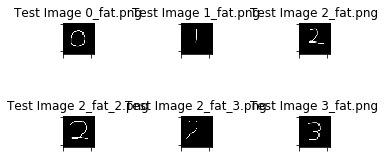

In [12]:
import os

im_fns = []
reshaped_imgs = []

img_path = os.path.realpath(os.getcwd()) + "\\mnist_test_imgs\\280x280\\"
print('Parsing Images In {}'.format(img_path))

for fn in os.listdir(img_path):
#     print(fn)
    if os.path.isdir('mnist_test_imgs\\' + fn):
#         print('This is a DIR: {}'.format(fn))
        continue
    else:
        im = cv2.imread(img_path + fn, 0)
        im_resized = cv2.resize(src=im, dsize=(28,28), interpolation=cv2.INTER_LINEAR)
        im_reshaped = im_resized.reshape(1, 784).astype('float32')/255.
        im_fns.append(fn)
        reshaped_imgs.append(im_reshaped)

        
        
print('Let\'s display the first 9 images drawn...')
fig = plt.figure()
for i in range(6):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(reshaped_imgs[i].reshape(28,28), cmap='gray')
    plt.title("Test Image {}".format(im_fns[i]))
    fig.subplots_adjust(hspace=2)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
plt.savefig('mnist_first_9_samples')
    

The value that was predicted is 1


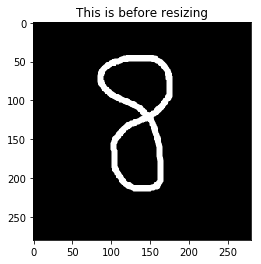

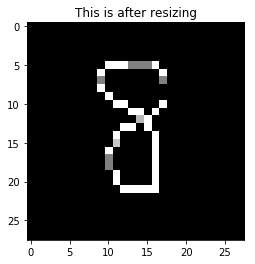

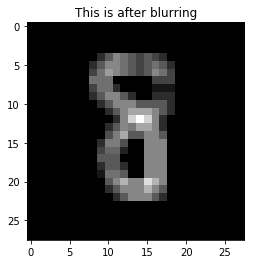

<Figure size 432x288 with 0 Axes>

In [25]:
# fn represents filename i.e. mnist_test_imgs/280x280/1_fat.png
# show_img is a bool that will show images if you want
# blur will blur the image before returning it with a 3x3 kernel
def scale_400(fn, show_img=True, blur=False):
    """This will scale 280x280 to 28x28 and convert the image to float ranging from 0 to 1"""
    
    gray = cv2.imread(fn, 0) # read image in gray
    gray=gray/255.
    # maintain aspect ratio and scale down 90% to 28x28 image shape
    resized_gray = cv2.resize(gray, None, fx=.1, fy=.1, interpolation=cv2.INTER_NEAREST)
    # this guy will display the image under this cell inline
    if show_img:
        plt.imshow(gray, cmap='gray') 
        plt.title("This is before resizing")
        plt.figure()
        plt.imshow(resized_gray, cmap='gray') 
        plt.title("This is after resizing")
        plt.figure()
        if blur:
            blurred = cv2.blur(resized_gray, (3,3))
            plt.imshow(blurred, cmap='gray') 
            plt.title("This is after blurring")
            plt.figure()
            return blurred
    print("The shape of our image after resizing is {}".format(gray.shape))
    return resized_gray

# if you want to display the image it as easy as:
# 1. Read image using im = cv2.imread(image_filename, 0) -> 0 forces the func to read the image as gray (bw)
# 2. Pass object into plt.imshow(name_of_im, cmap='gray') -> cmap (color map) by default will not display in grayscale

# if you want to predict what digit is in the image using the model make sure to run the model (2 cells) then do
# model.predict_classes(im.reshape(1, 784)) --> we have to flatten the 28x28 image into 1x784
# the model.predict_classes() function will return a list with one number displaying what was shown

# to view the specific accuracies for each class you would need to do model.predict(im.reshape(1,784)) 
# keep in mind that this will contain a nested list of floats. The first value --> digit 0, second value --> digit 1, etc...

# Usage Examples
gray = scale_400('mnist_test_imgs/280x280/8_fat.png', show_img=True, blur=True)
# plt.imshow(gray, cmap='gray')

digit = model.predict_classes(gray.reshape(1, 784))
print('The value that was predicted is {}'.format(digit[0]))


# gray = scale_400('mnist_test_imgs/280x280/6_fat_2.png', show_img=True, blur=True)
# digit = model.predict_classes(gray.reshape(1, 784))
# print('The value that was predicted is {}'.format(digit[0]))

## The struggle is real

Remember when we discussed overfitting? This model is notorious for breaking when it comes to deciphering actual hand written digits... but why? Didn't the dataset originally come from curated, handwritten digits? 

Well here's why:
1. The MNIST Dataset providers chose to take very specific methods for curating these images... 

    *"The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field." - MNIST Site*
    
    So without those specific steps we cannot recreate the same level of accuracy. This is why preprocessing is important. 
    
    
2. Preprocessing is probably the most important task in training an ML algorithm. It is also one of the hardest steps throughout the entire process

<h1>Everthing under here was me fooling around with different aspect ratios, resizing images and centering them... etc...</h1>

In [ ]:
gray = cv2.imread('mnist_test_imgs/400x400/2_.5_25.png', 0)
# print('Before resizing the image our image was {} x {}'.format(*gray.shape))
gray = gray/255.
# gray[gray>.9] = 1
# gray[gray<=.9]=0

gray = cv2.resize(gray, None, fx=.1, fy=.1, interpolation=cv2.INTER_NEAREST)
# convert to 0-1 range


while np.sum(gray[0]) == 0:
#     print('The top border is black')
    if gray.shape[0] == 28:
        break
    gray = gray[1:]
while np.sum(gray[:,0]) == 0:
    if gray.shape[1] == 28:
        break
#     print('The left border is black')
    gray = np.delete(gray,0,1)
while np.sum(gray[-1]) == 0:
    if gray.shape[0] == 28:
        break
#     print('The bottom border is black')
    gray = gray[:-1]
while np.sum(gray[:,-1]) == 0:
    if gray.shape[1] == 28:
        break
#     print('The right border is black')
    gray = np.delete(gray,-1,1)

print(gray.shape)
if gray.shape[0] > 28 or gray.shape[1] > 28:
    print('uhoh')
    gray = cv2.resize(gray, (28,28), interpolation=cv2.INTER_NEAREST)
# mnist_size = (28,28)
# curr_size = gray.shape
# w_diff = mnist_size[1] - curr_size[1]
# h_diff = mnist_size[0] - curr_size[0]
# top, bottom = h_diff//2, h_diff-(h_diff//2)
# left, right = w_diff//2, w_diff-(w_diff//2)
# print(top, bottom, left, right)
# gray = cv2.copyMakeBorder(gray, top, bottom, left, right, cv2.BORDER_CONSTANT,
#     value=0)

# gray = cv2.GaussianBlur(gray, (3,3), 0)
# gray[gray>.1] = 1
plt.imshow(gray, cmap='gray')
print(model.predict_classes(gray.reshape(1,784)))
print(model.predict(gray.reshape(1,784)))

In [ ]:
#OLD WORK 
#This is for if we had to resize from 400x400


#we need to read the image first, in gray scale
gray = cv2.imread('mnist_test_imgs/100x100/6_slim.png', 0) # your original image of 6
# gray = 255-gray
# gray = gray/255.


gray = gray/255.
gray[gray<.9]=0
gray[gray>.9]=1
    
print("before resizing and padding the shape is {}".format(gray.shape))
gray = cv2.resize(gray, None, fx=.2, fy=.2, interpolation = cv2.INTER_LINEAR_EXACT)
plt.imshow(gray, cmap='gray')

print(np.max(gray), np.min(gray))

while np.sum(gray[0]) == 0:
#     print('The top border is black')
    gray = gray[1:]

while np.sum(gray[:,0]) == 0:
#     print('The left border is black')
    gray = np.delete(gray,0,1)

while np.sum(gray[-1]) == 0:
#     print('The bottom border is black')
    gray = gray[:-1]

while np.sum(gray[:,-1]) == 0:
#     print('The bottom border is black')
    gray = np.delete(gray,-1,1)
    
gray = np.lib.pad(gray,(4,4),'constant', constant_values=(0,0))
print("after resizing and padding the shape is {}".format(gray.shape))

plt.imshow(gray,cmap='gray')
# gray = cv2.blur(gray, (5,5))
gray = cv2.GaussianBlur(gray,(9,9),0)
plt.imshow(gray,cmap='gray')

model.predict_classes(gray.reshape(1, 784))

In [ ]:

kernel = np.ones((3,3),np.uint8)
kernel2 = np.ones((1,1), np.uint8)
dilatation = cv2.dilate(gray,kernel,iterations = 1)
erosion = cv2.erode(dilatation, kernel, iterations=1)
plt.imshow(erosion, cmap='gray')


In [ ]:


# while np.sum(gray[0]) == 0:
# #     print('The top border is black')
#     gray = gray[1:]

# while np.sum(gray[:,0]) == 0:
# #     print('The left border is black')
#     gray = np.delete(gray,0,1)

# while np.sum(gray[-1]) == 0:
# #     print('The bottom border is black')
#     gray = gray[:-1]

# while np.sum(gray[:,-1]) == 0:
# #     print('The bottom border is black')
#     gray = np.delete(gray,-1,1)

# plt.imshow(gray)

# gray = cv2.copyMakeBorder(gray,7,8,8,7,cv2.BORDER_REPLICATE)

# print(gray.shape)

# model.predict_classes(gray.reshape(-1, 784))
# model.predict(X_test[0].reshape(-1, 784))
# model.predict_classes(X_test[0].reshape(-1, 784))

print(gray.shape)

In [ ]:

new1 = cv2.imread('mnist_test_imgs/400x400/400x400x5xfat.png', 0)
new1 = cv2.resize(new1,None,fx=.1, fy=.1, interpolation=cv2.INTER_LINEAR)
new1[new1 < .05] = 0

new1 = cv2.resize(new1,None,fx=.5, fy=.5, interpolation=cv2.INTER_LINEAR)
new1[new1>.80] = 1
plt.imshow(new1, cmap='gray')
print(new1.shape)
new_im = cv2.copyMakeBorder(new1, 4, 4, 4, 4, cv2.BORDER_CONSTANT,
    value=0)

model.predict_classes(new_im.reshape(1, 784))

In [ ]:

kernel = np.ones((1,1),np.uint8)
dilatation = cv2.dilate(new_im,kernel,iterations = 1)

plt.imshow(dilatation)

In [ ]:


im_fns = []
reshaped_imgs = []

img_path = os.path.realpath(os.getcwd()) + "\\mnist_test_imgs\\400x400\\"
print('Parsing Images In {}'.format(img_path))

for fn in os.listdir(img_path):
    print(fn)
    if os.path.isdir('mnist_test_imgs\\' + fn):
        print('This is a DIR: {}'.format(fn))
        continue
    else:
        im = cv2.imread(img_path + fn, 0)
        im_resized = cv2.resize(src=im, dsize=(28,28), interpolation=cv2.INTER_LINEAR)
        im_reshaped = im_resized.reshape(1, 784).astype('float32')/255.
        im_fns.append(fn)
        reshaped_imgs.append(im_reshaped)

        
        
print('Let\'s display the first 9 images drawn...')
fig = plt.figure()
for i in range(6):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(reshaped_imgs[i].reshape(28,28))
    plt.title("Test Image {}".format(im_fns[i]))
    fig.subplots_adjust(hspace=2)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
plt.savefig('mnist_first_9_samples')
    
    

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure()
for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
    fig.subplots_adjust(hspace=.8)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

plt.savefig('example_mnist_imgs.png')
im1 = np.array(x_train[:1]).reshape(28, 28)
# cv2.imwrite('mnist_sample1.jpg', im1)
plt.imshow(im1)